## basic work

make a Tf record with 
- 10 sec mel spectrogram
- primary label
- secondary label
- prediction
- rating
- lat & long

Next steps
- call type
- time

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import cv2
from joblib import delayed,Parallel
import pandas as pd

import os, json, random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf, re, math
from tqdm import tqdm

In [2]:
main_df= pd.read_csv('../prediction/binary_v3_SED/train_competition_v1_binary_merged.csv')
main_df['secondary_label_index'] = main_df['secondary_label_index'].apply(eval) 
main_df.head()

,itemid,hasbird,prediction,song_name,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename,primary_label_index,secondary_label_index,fold
0,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.941831,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],3
1,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.857844,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],0
2,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.905810,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],7
3,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.823133,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],4
4,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.812675,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],0


In [3]:
classes = 152
sec_str = 0.3
for i,row in tqdm(main_df.iterrows()):
    
    label = row.primary_label_index
    prediction = row.prediction
    label = tf.one_hot(label, classes)
    label = label.numpy()
    secondary_label = row.secondary_label_index
    
    
    
    ## try 
    secondary_label = [5,123]
    sec = []
    if len(secondary_label) > 0:
        for i in secondary_label:
            #pass

            if i != -1:
                #pass
                print('sec',i)
                sec.append(tf.one_hot(i, classes) * sec_str)
            

        if len(sec)>1:
            sec = np.array(sec).sum(axis=0)
    else:
        sec.append([0]*classes)
        sec = np.array(sec).sum(axis=0)
    print(label.shape)
    print(sec.shape)
    label += sec
    label = label * prediction
    
    print(label)
    break

0it [00:00, ?it/s]2022-05-15 13:02:38.714071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 13:02:38.877514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 13:02:38.877884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 13:02:38.881388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 13:02:38.881686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successfu

sec 5
sec 123
(152,)
(152,)
[0.         0.         0.         0.         0.         0.28254938
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.94183123 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

In [4]:
def get_fold(fold):
    val_df = main_df[main_df.fold==fold].reset_index(drop=True)
    return val_df

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    if type(value) == list:
        return tf.train.Feature(float_list=tf.train.FloatList(value=value))
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    if type(value) == list:
        return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

'''
10 sec mel spectrogram
primary label
secondary label
prediction
rating
lat & long
'''

def serialize_example(image,image_name, label, prediction, rating, lat, long):
    feature = {
        'image': _bytes_feature(image),
        'image_name': _bytes_feature(image_name),
        'label': _float_feature(label),
        'prediction': _float_feature(prediction),
        'rating': _float_feature(rating),
        'lat': _float_feature(lat),
        'long': _float_feature(long),

      }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [4]:
main_df.head()

,itemid,hasbird,prediction,song_name,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename,primary_label_index,secondary_label_index,fold
0,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.941831,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],3
1,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.857844,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],0
2,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.905810,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],7
3,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.823133,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],4
4,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.812675,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],0


## lets do the pink and brown noise

In [16]:
main_df['itemid'].values[6543][38:].replace('.jpg','')

'calqua/XC661339_sec_420'

In [7]:
'''
10 sec mel spectrogram
primary label
secondary label
prediction
rating
lat & long
'''


classes = 152
sec_str = 0.5
def create_tf_records(fold = 0):
    df = get_fold(fold)
    tfr_filename = f'../data/tfrec/competition/v4/happywhale-2022-train-{fold}-{df.shape[0]}.tfrec'
    with tf.io.TFRecordWriter(tfr_filename) as writer:
        for i,row in tqdm(df.iterrows()):
            itemid = row.itemid
            name = itemid[38:].replace('.jpg','')
                        
            label = row.primary_label_index
            prediction = row.prediction
            label = tf.one_hot(label, classes)
            label = label.numpy()
            secondary_label = row.secondary_label_index
            sec = []
            if len(secondary_label) > 0:
                for i in secondary_label:
                    if i != -1:
                        sec.append(tf.one_hot(i, classes) * sec_str)
                if len(sec)>0:
                    sec = np.array(sec).sum(axis=0)
            else:
                sec.append([0]*classes)
                sec = np.array(sec).sum(axis=0)
            
            label += sec
            label = label * prediction
            label = label.tolist()
            rating = row.rating
            lat = row.latitude
            long = row.longitude
            image = tf.io.read_file(itemid)
            #audio, sample_rate = tf.audio.decode_wav(audio,
            #                                 desired_channels=-1,
            #                                 desired_samples=-1)
            image_name = str.encode(str(name))
            example = serialize_example(image,image_name,label, prediction, rating, lat, long)
            writer.write(example)
            

In [8]:
for fold in range(8):
    create_tf_records(fold = fold)

8939it [00:05, 1662.92it/s]
8939it [00:04, 2082.66it/s]
8939it [00:04, 2017.26it/s]
8939it [00:04, 2114.00it/s]
8939it [00:04, 2080.52it/s]
8939it [00:04, 2137.44it/s]
8939it [00:04, 2127.77it/s]
8938it [00:04, 2119.71it/s]


In [10]:
import os, json, random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf, re, math
from tqdm import tqdm

## lets visualize

In [16]:

def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image,IMAGE_SIZE_)
    return image


def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        #'label': tf.io.FixedLenFeature([], tf.float32),
        'label': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing = True),
        'prediction': tf.io.FixedLenFeature([], tf.float32),
        'rating': tf.io.FixedLenFeature([], tf.float32),
        'lat': tf.io.FixedLenFeature([], tf.float32),
        'long': tf.io.FixedLenFeature([], tf.float32),
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    #example2 = tf.io.parse_tensor(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    image_name = example['image_name']
    label = example['label']
    #secondary_label = example['secondary_label']
    #print('sec',secondary_label)
    prediction = example['prediction']
    rating = example['rating']
    lat = example['lat']
    long = example['long']
    
    return image, label,  #prediction, rating, lat, long,# secondary_label # returns a dataset of (image, label) pairs

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [17]:
# numpy and matplotlib defaults
np.set_printoptions(threshold=15, linewidth=80)
CLASSES = [0,1]

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    #if numpy_labels.dtype == object: # binary string in this case, these are image ID strings
    #    numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def display_single_sample(image, label, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    title = str(label)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch):
    """
    Display single batch Of images 
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        correct = True
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_single_sample(image, label, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

8
71511


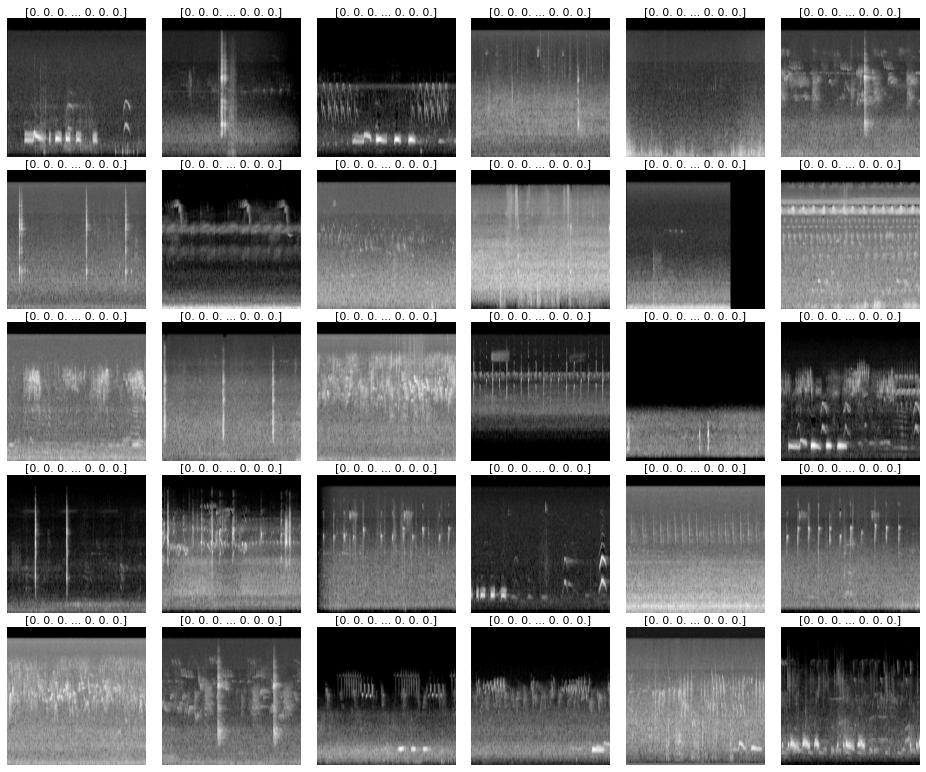

In [23]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
IMAGE_SIZE_ = [IMAGE_SIZE,IMAGE_SIZE]
AUTO = tf.data.experimental.AUTOTUNE
TRAINING_FILENAMES = tf.io.gfile.glob(f'../data/tfrec/competition/v1/happywhale-2022-train-*.tfrec')
print(len(TRAINING_FILENAMES))
dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
dataset = dataset.repeat()
dataset = dataset.shuffle(2048)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(AUTO) #This dataset can directly be passed to keras.fit method
print(count_data_items(TRAINING_FILENAMES))

# Displaying single batch of TFRecord
train_batch = iter(dataset)
display_batch_of_images(next(train_batch))

## Lets make the augmented tfrec

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import cv2
from joblib import delayed,Parallel
import pandas as pd

import os, json, random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf, re, math
from tqdm import tqdm

In [2]:
main_df= pd.read_csv('../prediction/binary_v3_SED/train_competition_v1_binary_merged.csv')
main_df['secondary_label_index'] = main_df['secondary_label_index'].apply(eval) 
main_df.head()

,itemid,hasbird,prediction,song_name,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename,primary_label_index,secondary_label_index,fold
0,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.941831,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],3
1,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.857844,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],0
2,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.905810,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],7
3,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.823133,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],4
4,../data/librosa/competition/v1/10_sec/moudov/X...,0,0.812675,moudov/XC138056,moudov,[],['nest-coo pair at potential nest-site'],40.1226,-75.0635,Zenaida macroura,Mourning Dove,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/138056,moudov/XC138056.ogg,33,[],0


In [4]:
def get_fold(fold):
    val_df = main_df[main_df.fold==fold].reset_index(drop=True)
    return val_df

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    if type(value) == list:
        return tf.train.Feature(float_list=tf.train.FloatList(value=value))
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    if type(value) == list:
        return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

'''
10 sec mel spectrogram
primary label
secondary label
prediction
rating
lat & long
'''

def serialize_example(image_ori,image_AddGaussianSNR,image_brown,image_gain,image_GaussianNoise,image_pink,image_name, label, prediction, rating, lat, long):
    feature = {
        'image_ori': _bytes_feature(image_ori),
        'image_AddGaussianSNR': _bytes_feature(image_AddGaussianSNR),
        'image_brown': _bytes_feature(image_brown),
        'image_gain': _bytes_feature(image_gain),
        'image_GaussianNoise': _bytes_feature(image_GaussianNoise),
        'image_pink': _bytes_feature(image_pink),
        
        'image_name': _bytes_feature(image_name),
        'label': _float_feature(label),
        'prediction': _float_feature(prediction),
        'rating': _float_feature(rating),
        'lat': _float_feature(lat),
        'long': _float_feature(long),

      }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [5]:
main_df['itemid'].values[6543].replace('/10_sec/','/10_sec_aug_AddGaussianSNR/')

'../data/librosa/competition/v1/10_sec_aug_AddGaussianSNR/calqua/XC661339_sec_420.jpg'

In [6]:
'''
10 sec mel spectrogram
primary label
secondary label
prediction
rating
lat & long
'''


classes = 152
sec_str = 0.5
def create_tf_records(fold = 0):
    df = get_fold(fold)
    tfr_filename = f'../data/tfrec/competition/v4/happywhale-2022-train-{fold}-{df.shape[0]}.tfrec'
    with tf.io.TFRecordWriter(tfr_filename) as writer:
        for i,row in tqdm(df.iterrows()):
            itemid = row.itemid
            name = itemid[38:].replace('.jpg','')
                        
            label = row.primary_label_index
            prediction = row.prediction
            label = tf.one_hot(label, classes)
            label = label.numpy()
            secondary_label = row.secondary_label_index
            sec = []
            if len(secondary_label) > 0:
                for i in secondary_label:
                    if i != -1:
                        sec.append(tf.one_hot(i, classes) * sec_str)
                if len(sec)>0:
                    sec = np.array(sec).sum(axis=0)
            else:
                sec.append([0]*classes)
                sec = np.array(sec).sum(axis=0)
            
            label += sec
            label = label * prediction
            label = label.tolist()
            rating = row.rating
            lat = row.latitude
            long = row.longitude
            image_ori = tf.io.read_file(itemid)
            image_AddGaussianSNR = tf.io.read_file(itemid.replace('/10_sec/','/10_sec_aug_AddGaussianSNR/'))
            image_brown = tf.io.read_file(itemid.replace('/10_sec/','/10_sec_aug_brown_noise/'))
            image_gain = tf.io.read_file(itemid.replace('/10_sec/','/10_sec_aug_Gain/'))
            image_GaussianNoise = tf.io.read_file(itemid.replace('/10_sec/','/10_sec_aug_GaussianNoise/'))
            image_pink = tf.io.read_file(itemid.replace('/10_sec/','/10_sec_aug_pink_noise/'))
            #audio, sample_rate = tf.audio.decode_wav(audio,
            #                                 desired_channels=-1,
            #                                 desired_samples=-1)
            image_name = str.encode(str(name))
            example = serialize_example(image_ori,image_AddGaussianSNR,image_brown,image_gain,image_GaussianNoise,image_pink,
                                        image_name,label, prediction, rating, lat, long)
            writer.write(example)
            

In [7]:
for fold in range(8):
    create_tf_records(fold = fold)

0it [00:00, ?it/s]2022-05-19 06:29:29.568774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:29:29.582122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:29:29.582294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:29:29.583536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:29:29.583678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successfu

## lets verify augmented TFrec

In [25]:

def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image,IMAGE_SIZE_)
    return image


def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image_ori": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_AddGaussianSNR": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_brown": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_gain": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_GaussianNoise": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_pink": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        #'label': tf.io.FixedLenFeature([], tf.float32),
        'label': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing = True),
        'prediction': tf.io.FixedLenFeature([], tf.float32),
        'rating': tf.io.FixedLenFeature([], tf.float32),
        'lat': tf.io.FixedLenFeature([], tf.float32),
        'long': tf.io.FixedLenFeature([], tf.float32),
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    #example2 = tf.io.parse_tensor(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image_pink'])
    image_name = example['image_name']
    label = example['label']
    #secondary_label = example['secondary_label']
    #print('sec',secondary_label)
    prediction = example['prediction']
    rating = example['rating']
    lat = example['lat']
    long = example['long']
    
    return image, label,  #prediction, rating, lat, long,# secondary_label # returns a dataset of (image, label) pairs

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [23]:
# numpy and matplotlib defaults
np.set_printoptions(threshold=15, linewidth=80)
CLASSES = [0,1]

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    #if numpy_labels.dtype == object: # binary string in this case, these are image ID strings
    #    numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def display_single_sample(image, label, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    title = str(label)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch):
    """
    Display single batch Of images 
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        correct = True
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_single_sample(image, label, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

8
71511


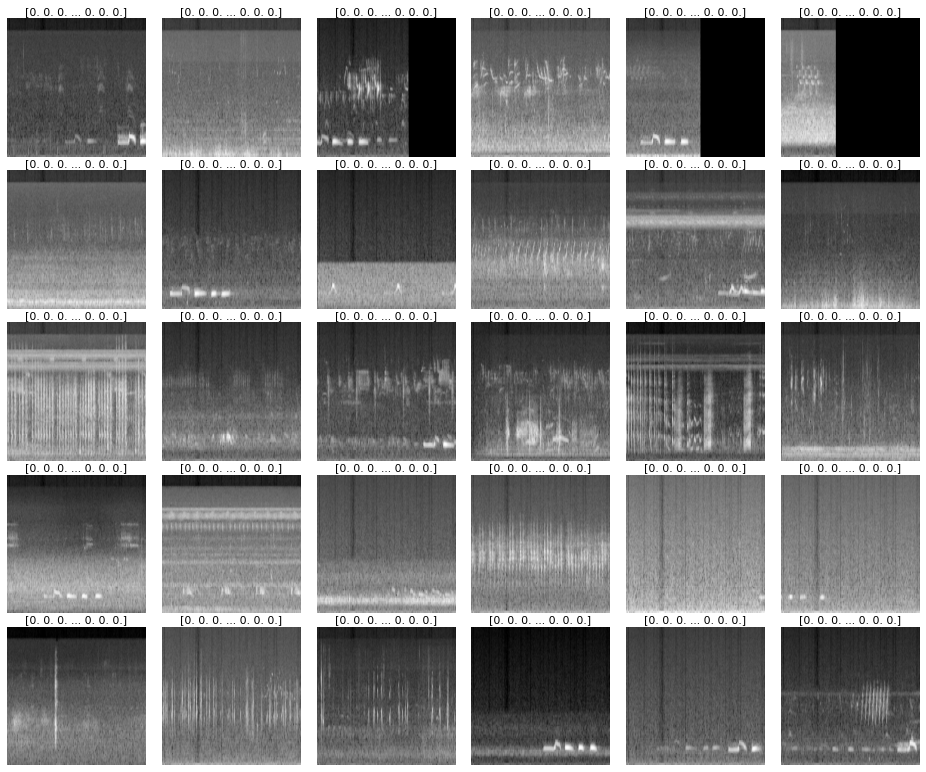

In [26]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
IMAGE_SIZE_ = [IMAGE_SIZE,IMAGE_SIZE]
AUTO = tf.data.experimental.AUTOTUNE
TRAINING_FILENAMES = tf.io.gfile.glob(f'../data/tfrec/competition/v4/happywhale-2022-train-*.tfrec')
print(len(TRAINING_FILENAMES))
dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
dataset = dataset.repeat()
dataset = dataset.shuffle(2048)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(AUTO) #This dataset can directly be passed to keras.fit method
print(count_data_items(TRAINING_FILENAMES))

# Displaying single batch of TFRecord
train_batch = iter(dataset)
display_batch_of_images(next(train_batch))